# Imports

In [34]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Helper Functions

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def report_classification(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'f1-Score': f1 }



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Load

In [3]:
# Dados de Treinamento
X_train = pd.read_csv('../../data/Classificacao/X_training.csv')
y_train = pd.read_csv('../../data/Classificacao/y_training.csv')

# Dados de Test
X_test = pd.read_csv('../../data/Classificacao/X_test.csv')
y_test = pd.read_csv('../../data/Classificacao/y_test.csv')

# Dados de Validacao
X_val = pd.read_csv('../../data/Classificacao/X_validation.csv')
y_val = pd.read_csv('../../data/Classificacao/y_validation.csv')

In [4]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])
X_val = X_val.drop(columns=['id'])

# Treinamento

## KNN

In [5]:
# !pip install --upgrade scikit-learn numpy

In [46]:
from sklearn.metrics import classification_report

def train_apply_knn(X_train, y_train, neigh, dataset_type, X_test=None, y_test=None, X_val=None, y_val=None):
    results = []
    
    for k in neigh:
        # Model Definition
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Model Train
        #knn.fit(X_train, y_train)
        knn.fit(np.array(X_train), np.array(y_train))

        # Choose dataset based on dataset_type
        if dataset_type == "train":
            X_target, y_target = X_train, y_train
        elif dataset_type == "test":
            if X_test is None or y_test is None:
                raise ValueError("Forneça os dados de Test")
            X_target, y_target = X_test, y_test
        elif dataset_type == "val":
            if X_val is None or y_val is None:
                raise ValueError("Forneça os dados de val")
            X_target, y_target = X_val, y_val
        else:
            raise ValueError("dataset_type inválido")
        
        # Model Performance
        predictions = knn.predict(np.array(X_target) )
        report = classification_report(y_target, predictions, output_dict=True)
        
        results.append({
            'n_neighbors': k,
            'Accuracy': report['accuracy'],
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'f1-Score': report['weighted avg']['f1-score'],
            'Dataset': dataset_type
        })

    return results


In [47]:
neigh = np.arange(1,30,1)

#Aplicando nos próprios dados de treino
train_report_knn = train_apply_knn(X_train, y_train, neigh, 'train', X_test=None, y_test=None, X_val=None, y_val=None)

# Aplicando nos dados de Teste
test_report_knn = train_apply_knn(X_train, y_train, neigh, 'test', X_test=X_test, y_test=y_test, X_val=None, y_val=None)

# Aplicando nos dados de Validação
val_report_knn = train_apply_knn(X_train, y_train, neigh, 'val', X_test=None, y_test=None, X_val=X_val, y_val=y_val)

In [48]:
df_train_knn = pd.DataFrame(train_report_knn)
df_test_knn = pd.DataFrame(test_report_knn)
df_val_knn = pd.DataFrame(val_report_knn)
df_all_knn = pd.concat([df_train_knn, df_test_knn, df_val_knn])
df_all_knn

,n_neighbors,Accuracy,Precision,Recall,f1-Score,Dataset
0,1,1.000000,1.000000,1.000000,1.000000,train
1,2,0.948231,0.952565,0.948231,0.947718,train
2,3,0.957016,0.957590,0.957016,0.956874,train
3,4,0.941874,0.945212,0.941874,0.941366,train
4,5,0.947583,0.948649,0.947583,0.947339,train
5,6,0.939213,0.942289,0.939213,0.938700,train
6,7,0.943019,0.944375,0.943019,0.942712,train
7,8,0.936565,0.939618,0.936565,0.936027,train
8,9,0.939557,0.941196,0.939557,0.939193,train
9,10,0.934662,0.937611,0.934662,0.934114,train


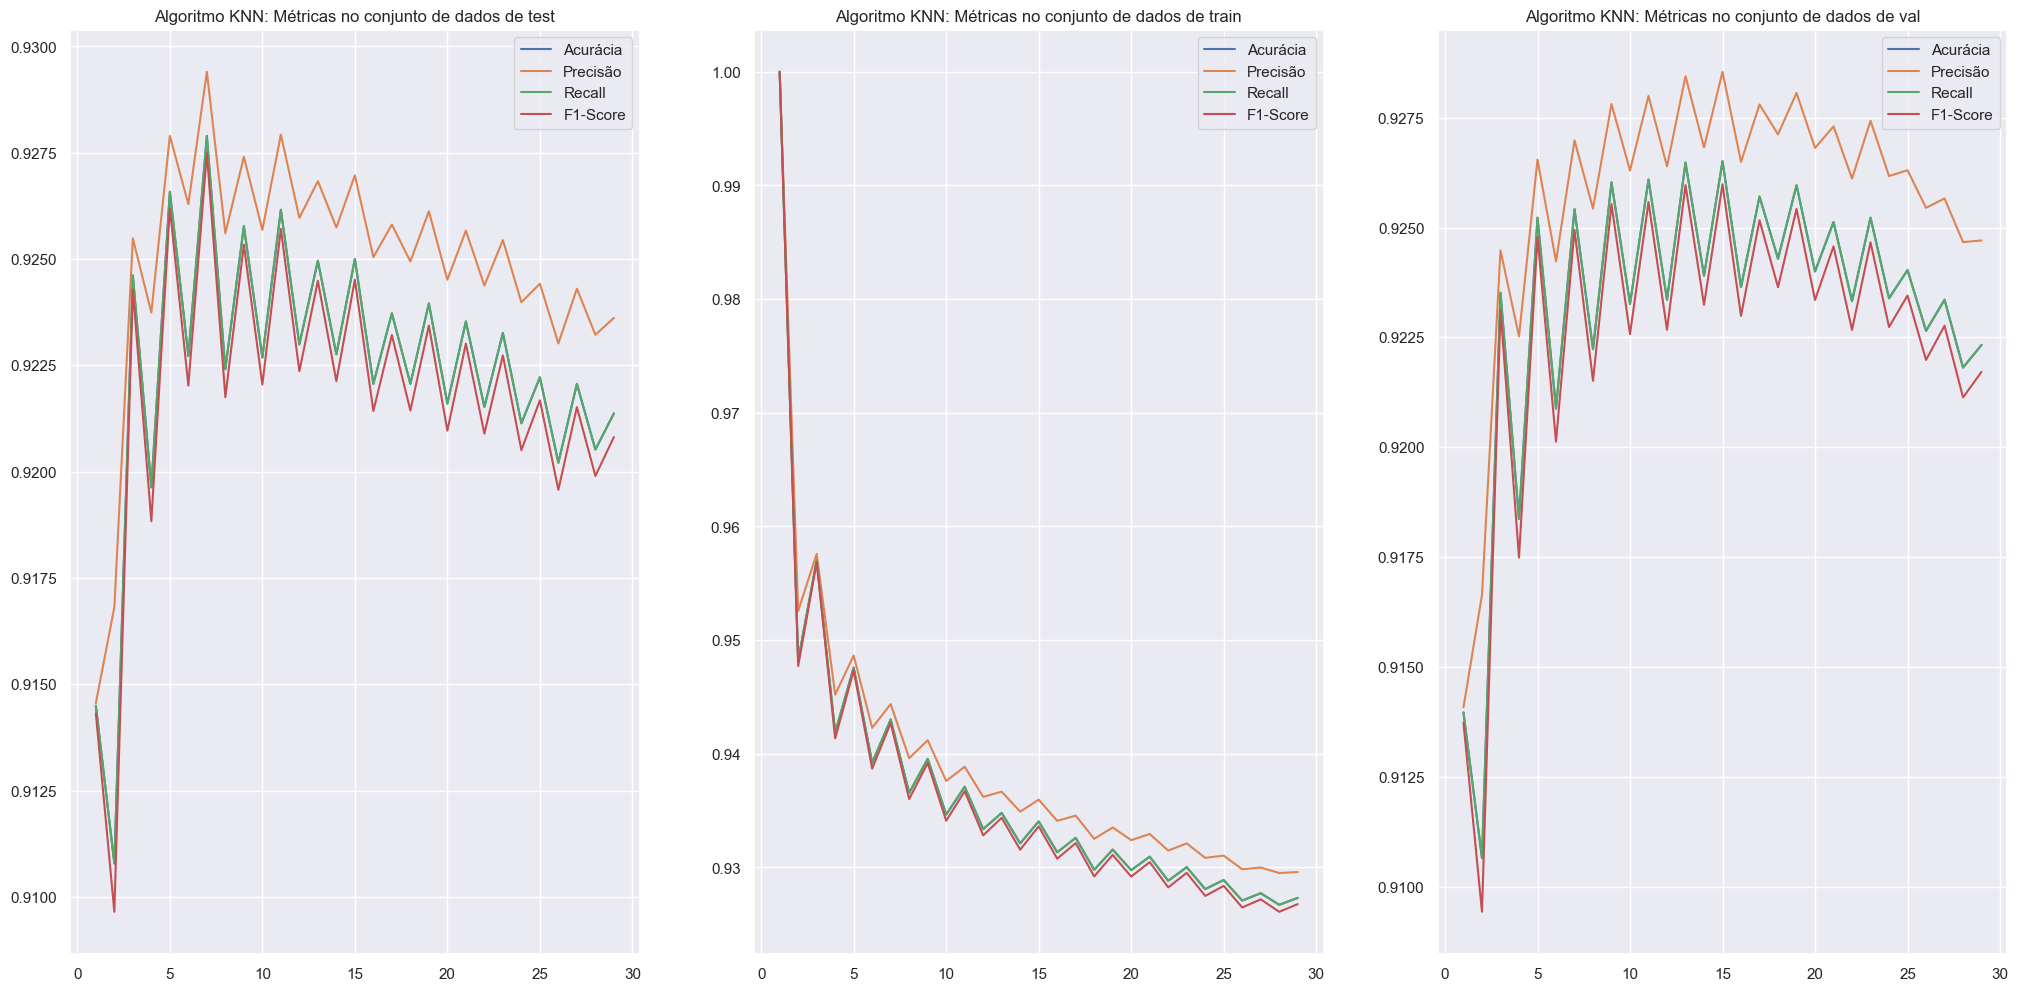

In [49]:
dataset_types = np.unique(df_all_knn['Dataset'])
cont = 0
for i in dataset_types:
    cont += 1
    subset = df_all_knn.loc[df_all_knn['Dataset'] == i]
    
    plt.subplot(1,3, cont)
    plt.plot(subset['n_neighbors'],subset['Accuracy'], label='Acurácia')
    plt.plot(subset['n_neighbors'],subset['Precision'], label='Precisão')
    plt.plot(subset['n_neighbors'],subset['Recall'], label='Recall')
    plt.plot(subset['n_neighbors'],subset['f1-Score'], label='F1-Score')
    plt.title('Algoritmo KNN: Métricas no conjunto de dados de '+ i)
    plt.legend()
    #for indices, linha in df_all_knn.iterrows():



In [29]:
df_all_knn

,n_neighbors,Accuracy,Precision,Recall,f1-Score,Dataset
0,1,1.000000,1.000000,1.000000,1.000000,train
1,2,0.948231,0.952565,0.948231,0.947718,train
2,3,0.957016,0.957590,0.957016,0.956874,train
3,4,0.941874,0.945212,0.941874,0.941366,train
4,5,0.947583,0.948649,0.947583,0.947339,train
5,6,0.939213,0.942289,0.939213,0.938700,train
6,7,0.943019,0.944375,0.943019,0.942712,train
7,8,0.936565,0.939618,0.936565,0.936027,train
8,9,0.939557,0.941196,0.939557,0.939193,train
0,1,0.914494,0.914557,0.914494,0.914314,test
